import libraries


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

prepare the dataset

In [16]:
import os

autism_folder = 'C:/autism'

subfolders = ['train', 'test', 'valid']
categories = ['non_autistic', 'autistic']

for folder in [autism_folder] + [os.path.join(autism_folder, sub) for sub in subfolders]:
    os.makedirs(folder, exist_ok=True)

for subfolder in subfolders:
    for category in categories:
        os.makedirs(os.path.join(autism_folder, subfolder, category), exist_ok=True)


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(autism_folder, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(autism_folder, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(autism_folder, 'valid'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 200 images belonging to 2 classes.


Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [18]:
for subfolder in subfolders:
    for category in categories:
        folder_path = os.path.join(autism_folder, subfolder, category)
        num_photos = len(os.listdir(folder_path))
        print(f"Total number of photos in {subfolder}/{category}: {num_photos}")

Total number of photos in train/non_autistic: 1263
Total number of photos in train/autistic: 1263
Total number of photos in test/non_autistic: 100
Total number of photos in test/autistic: 100
Total number of photos in valid/non_autistic: 100
Total number of photos in valid/autistic: 100


prepare model

In [19]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,763,521
Trainable params: 1,048,833
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)


Epoch 1/50
78/78 [==============================] - 98s 1s/step - loss: 0.6450 - accuracy: 0.6596 - val_loss: 0.5954 - val_accuracy: 0.6771
Epoch 2/50
78/78 [==============================] - 95s 1s/step - loss: 0.5574 - accuracy: 0.7133 - val_loss: 0.5542 - val_accuracy: 0.6979
Epoch 3/50
78/78 [==============================] - 95s 1s/step - loss: 0.5476 - accuracy: 0.7149 - val_loss: 0.5497 - val_accuracy: 0.7604
Epoch 4/50
78/78 [==============================] - 95s 1s/step - loss: 0.5245 - accuracy: 0.7378 - val_loss: 0.5131 - val_accuracy: 0.7500
Epoch 5/50
78/78 [==============================] - 95s 1s/step - loss: 0.5334 - accuracy: 0.7249 - val_loss: 0.5308 - val_accuracy: 0.7240
Epoch 6/50
78/78 [==============================] - 95s 1s/step - loss: 0.5321 - accuracy: 0.7390 - val_loss: 0.5218 - val_accuracy: 0.7552
Epoch 7/50
78/78 [==============================] - 95s 1s/step - loss: 0.5314 - accuracy: 0.7358 - val_loss: 0.5285 - val_accuracy: 0.6823
Epoch 8/50
78/78 [==

In [24]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 7s 1s/step - loss: 0.4050 - accuracy: 0.8100
Test Accuracy: 0.8100000023841858


Text(0.5, 1.0, 'Accuracy Curves')

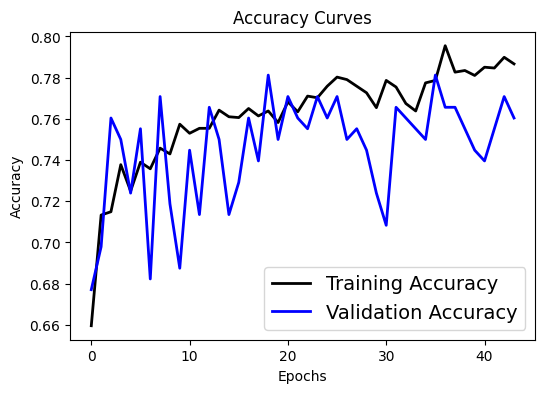

In [25]:
# Accuracy curve
import matplotlib.pyplot as plt

plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

Text(0.5, 1.0, 'Loss Curves')

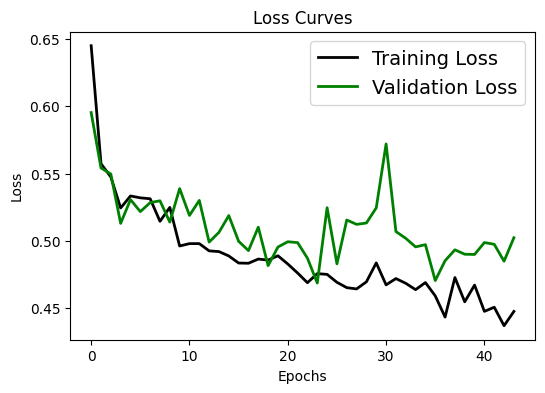

In [26]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)